In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import joblib

In [ ]:
titanic = sns.load_dataset("titanic")
df = titanic.copy()

print("Data Loaded",df.shape)
print(df.head())

Data Loaded (891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [9]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [10]:
print(df.describe(include="all").T)

             count unique          top freq       mean        std   min  \
survived     891.0    NaN          NaN  NaN   0.383838   0.486592   0.0   
pclass       891.0    NaN          NaN  NaN   2.308642   0.836071   1.0   
sex            891      2         male  577        NaN        NaN   NaN   
age          714.0    NaN          NaN  NaN  29.699118  14.526497  0.42   
sibsp        891.0    NaN          NaN  NaN   0.523008   1.102743   0.0   
parch        891.0    NaN          NaN  NaN   0.381594   0.806057   0.0   
fare         891.0    NaN          NaN  NaN  32.204208  49.693429   0.0   
embarked       889      3            S  644        NaN        NaN   NaN   
class          891      3        Third  491        NaN        NaN   NaN   
who            891      3          man  537        NaN        NaN   NaN   
adult_male     891      2         True  537        NaN        NaN   NaN   
deck           203      7            C   59        NaN        NaN   NaN   
embark_town    889      3

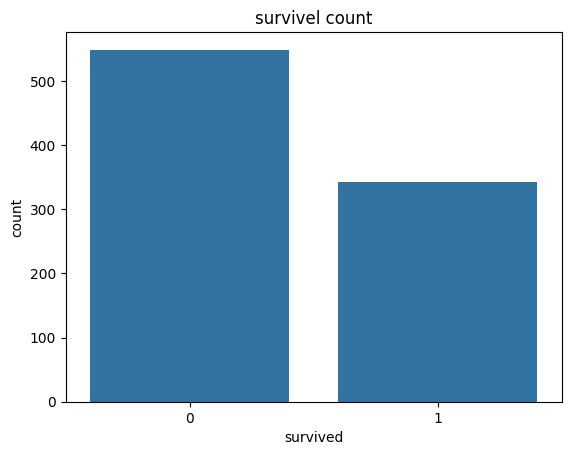

In [11]:
sns.countplot(data=df,x="survived")
plt.title("survivel count")
plt.show()

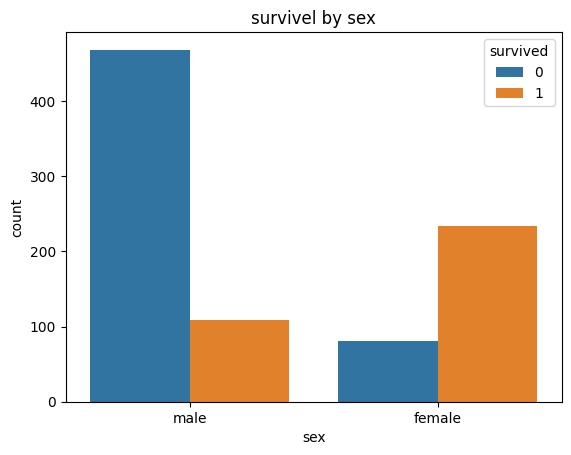

In [12]:
sns.countplot(data=df,x="sex",hue="survived")
plt.title("survivel by sex")
plt.show()

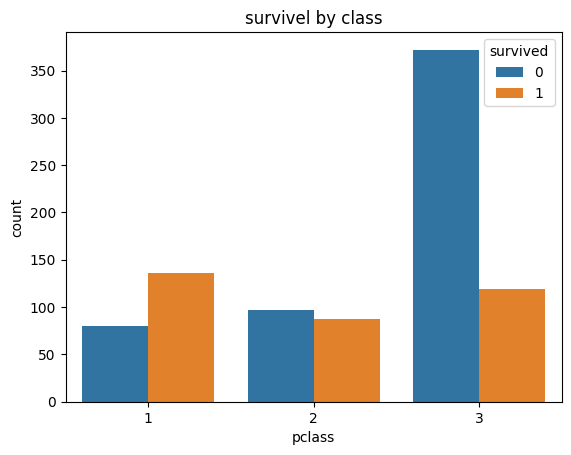

In [13]:
sns.countplot(data=df,x="pclass",hue="survived")
plt.title("survivel by class")
plt.show()

In [16]:
col = ["survived","pclass","sex","age","sibsp","parch","fare","embarked"]
df = df[col]
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [25]:
df = df.dropna(subset=["sex","embarked"])
df["age"] = df["age"].fillna(df["age"].median())

le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df["embarked"] = le.fit_transform(df["embarked"])

print("\nClean Data Shap",df.shape)


Clean Data Shap (889, 8)


In [29]:
x = df.drop("survived",axis=1)
y = df["survived"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
print(x_train.shape,x_test.shape)

(711, 7) (178, 7)


In [32]:
models = {
    "LinearRegression" : LogisticRegression(max_iter=500),
    "RandomForest" : RandomForestClassifier(n_estimators=200,random_state=42),
    "SVC-RBF" : SVC(kernel="rbf",probability=True,random_state=42),
}

In [33]:
result = {}
fitted_model = {}

for name,model in models.items():
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  acc = accuracy_score(y_test,pred)
  result[name] = acc
  fitted_model[name] = model
  print(f"====={name}=====")
  print(f"Accuracy : ",round(acc,4))
  print(f"Classification Report : \n",classification_report(y_test,pred))

=====LinearRegression=====
Accuracy :  0.809
Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.69      0.73        68

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178

=====RandomForest=====
Accuracy :  0.8146
Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.75        68

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

=====SVC-RBF=====
Accuracy :  0.6629
Classification Report : 
               precision    recall  f1-score   support

           0       0.67      0.88      0.76       110
           1       0.62      0.31  

In [35]:
best_name = max(result,key=result.get)
best_acc = result[best_name]
best_model = fitted_model[best_name]

print("\n==================")
print("Best Model : ",best_model)
print("Best Accuracy : ",best_acc)
print("\n==================")


Best Model :  RandomForestClassifier(n_estimators=200, random_state=42)
Best Accuracy :  0.8146067415730337



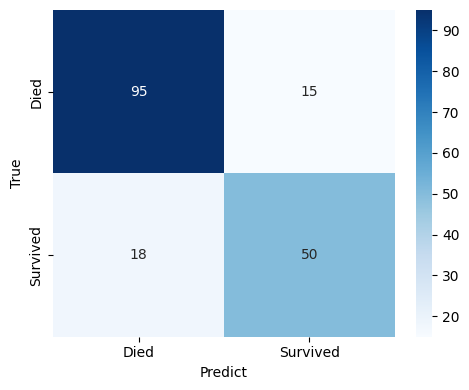

In [39]:
best_pred = best_model.predict(x_test)
cm = confusion_matrix(y_test,best_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=["Died","Survived"],yticklabels=["Died","Survived"])
plt.xlabel("Predict")
plt.ylabel("True")
plt.tight_layout()
plt.show()

In [40]:
joblib.dump(best_model,"Titanic_best_model.joblib")
print("Save Best Model")

Save Best Model


In [44]:
sample = np.array([[3,1,22,1,0,7.25,2]])
pred = best_model.predict(sample)[0]
print("\n Prediction for sample passenger:", "Survived" if pred==1 else "Died")


 Prediction for sample passenger: Died
